In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
# import data
path = r"C:\Users\abarr\Documents\projects\f1\f12025.csv"
f1 = pd.read_csv(path, encoding='iso-8859-1')


In [3]:
f1

,Pos.,No.,Driver,Team,Laps,Time / Retired,Pts.,Race,Race No.,Date
0,1,4,Lando Norris,McLaren,57.0,1:42:06.304,25,Australia,1.0,16/03/2025
1,2,1,Max Verstappen,Red Bull Racing,57.0,+0.895s,18,Australia,1.0,16/03/2025
2,3,63,George Russell,Mercedes,57.0,+8.481s,15,Australia,1.0,16/03/2025
3,4,12,Kimi Antonelli,Mercedes,57.0,+10.135s,12,Australia,1.0,16/03/2025
4,5,23,Alexander Albon,Williams,57.0,+12.773s,10,Australia,1.0,16/03/2025
...,...,...,...,...,...,...,...,...,...,...
574,16,10,Pierre Gasly,Alpine,56.0,+1 lap,0,Qatar,23.0,30/11/2025
575,17,18,Lance Stroll,Aston Martin,55.0,DNF,0,Qatar,23.0,30/11/2025
576,18,6,Isack Hadjar,Racing Bulls,55.0,DNF,0,Qatar,23.0,30/11/2025
577,NC,87,Oliver Bearman,Haas F1 Team,41.0,DNF,0,Qatar,23.0,30/11/2025


In [6]:
f1.dtypes

Pos.                      object
No.                        int64
Driver                    object
Team                      object
Laps                     float64
Time / Retired            object
Pts.                       int64
Race                      object
Race No.                 float64
Date              datetime64[ns]
dtype: object

In [5]:
f1["Date"] = pd.to_datetime(f1["Date"], format="%d/%m/%Y")

In [7]:
f1["Driver"].unique()

array(['Lando Norris', 'Max Verstappen', 'George Russell',
       'Kimi Antonelli', 'Alexander Albon', 'Lance Stroll',
       'Nico Hulkenberg', 'Charles Leclerc', 'Oscar Piastri',
       'Lewis Hamilton', 'Pierre Gasly', 'Yuki Tsunoda', 'Esteban Ocon',
       'Oliver Bearman', 'Liam Lawson', 'Gabriel Bortoleto',
       'Fernando Alonso', 'Carlos Sainz', 'Jack Doohan', 'Isack Hadjar',
       'Franco Colapinto'], dtype=object)

In [7]:
# create a table to show cumulative points by each race
# cumulative_points = pd.DataFrame()
# cumulative_points.columns() = ["Driver", "Race", "Total Pts"]


In [8]:
# norris_df = f1[f1["Driver"] == 'Lando Norris']
# norris_df.sort_values(by="Date", inplace=True)
# norris_df["Cumulative Pts"] = norris_df["Pts."].cumsum()
# norris_df

In [9]:
# norris_df_filtered = norris_df[["Pos.", "Driver", "Team", "Pts.", "Race", "Date", "Cumulative Pts"]]
# norris_df_filtered

In [10]:
# max_df = f1[f1["Driver"] == 'Max Verstappen']
# max_df["Cumulative Pts"] = max_df["Pts."].cumsum()
# max_df

In [8]:
f1_2025 = f1[["Pos.", "Driver", "Team", "Pts.", "Race", "Date"]]
f1_2025.sort_values(by=["Driver","Date"], inplace=True)

f1_2025["Cumulative Pts"] = f1_2025.groupby('Driver')["Pts."].transform(pd.Series.cumsum)

# df['cumsum'] = df.groupby('id')['val'].transform(pd.Series.cumsum)

f1_2025

C:\Users\abarr\AppData\Local\Temp\ipykernel_12816\1365448153.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f1_2025.sort_values(by=["Driver","Date"], inplace=True)
C:\Users\abarr\AppData\Local\Temp\ipykernel_12816\1365448153.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f1_2025["Cumulative Pts"] = f1_2025.groupby('Driver')["Pts."].transform(pd.Series.cumsum)


,Pos.,Driver,Team,Pts.,Race,Date,Cumulative Pts
4,5,Alexander Albon,Williams,10,Australia,2025-03-16,10
50,11,Alexander Albon,Williams,0,China - Sprint,2025-03-22,10
26,7,Alexander Albon,Williams,6,China,2025-03-23,16
68,9,Alexander Albon,Williams,2,Japan,2025-04-06,18
91,12,Alexander Albon,Williams,0,Bahrain,2025-04-13,18
...,...,...,...,...,...,...,...
491,13,Yuki Tsunoda,Red Bull Racing,0,Brazil - Sprint,2025-11-08,28
515,17,Yuki Tsunoda,Red Bull Racing,0,Brazil,2025-11-09,28
530,12,Yuki Tsunoda,Red Bull Racing,0,Las Vegas,2025-11-22,28
543,5,Yuki Tsunoda,Red Bull Racing,4,Qatar - Sprint,2025-11-29,32


In [9]:
top3 = f1_2025[f1_2025["Driver"].isin(["Max Verstappen", "Oscar Piastri", "Lando Norris"])]
top3

,Pos.,Driver,Team,Pts.,Race,Date,Cumulative Pts
0,1,Lando Norris,McLaren,25,Australia,2025-03-16,25
47,8,Lando Norris,McLaren,1,China - Sprint,2025-03-22,26
21,2,Lando Norris,McLaren,18,China,2025-03-23,44
61,2,Lando Norris,McLaren,18,Japan,2025-04-06,62
82,3,Lando Norris,McLaren,15,Bahrain,2025-04-13,77
...,...,...,...,...,...,...,...
497,NC,Oscar Piastri,McLaren,0,Brazil - Sprint,2025-11-08,356
503,5,Oscar Piastri,McLaren,10,Brazil,2025-11-09,366
538,DQ,Oscar Piastri,McLaren,0,Las Vegas,2025-11-22,366
539,1,Oscar Piastri,McLaren,8,Qatar - Sprint,2025-11-29,374


In [52]:
agosto_31 = top3[top3["Date"] == "2025-08-31"]
agosto_31

,Pos.,Driver,Team,Pts.,Race,Date,Cumulative Pts
356,18,Lando Norris,McLaren,0,Netherlands,2025-08-31,275
340,2,Max Verstappen,Red Bull Racing,18,Netherlands,2025-08-31,205
339,1,Oscar Piastri,McLaren,25,Netherlands,2025-08-31,309


In [ ]:
verstappen = f1_2025[f1_2025['Driver'] == 'Max Verstappen']
verstappen

In [ ]:
norris = f1_2025[f1_2025['Driver'] == 'Lando Norris']
norris

In [ ]:
piastri = f1_2025[f1_2025['Driver'] == 'Oscar Piastri']
piastri

In [ ]:
# fig2 = plt.scatter(top3, x="Date", y="Cumulative Pts", color="Driver")
# fig2.show()

In [ ]:
df = px.data.gapminder()
px.scatter(df, 
           x="gdpPercap", 
           y="lifeExp", 
           animation_frame="year", 
           animation_group="country",
           size="pop", 
           color="continent", 
           hover_name="country",
           log_x=True, 
           size_max=55, 
           range_x=[100,100000], range_y=[25,90])



In [ ]:
fig = px.scatter(top3, 
                 x="Date",
                 y="Cumulative Pts", 
                 color="Driver",
                 animation_frame="Race",
                 range_x=["2025-01-01","2025-12-31"],
                 range_y=[0,450],
                 size_max= 10000)
                # animation_group="country")

for trace in fig.data:
    trace.mode = 'lines+markers'


fig.show()


In [ ]:
import plotly.graph_objects as go

fig3 = go.Figure()

for driver in top3["Driver"].unique():
    driver_data = top3[top3['Driver'] == driver]

    fig3.add_trace(go.Scatter(
        x = driver_data['Date'],
        y = driver_data['Cumulative Pts'],
        mode = 'lines',
        name = driver,
        line = dict(width=2),
        showlegend = False
    ))

    fig3.add_trace(go.Scatter(
        x = driver_data['Date'],
        y = driver_data['Cumulative Pts'],
        mode = 'markers',
        name = driver,
        marker = dict(size=10)
    ))

fig3.update_layout(
    xaxis = dict(range = ["2025-01-01", "2025-12-31"]),
    yaxis = dict(range = [0, 450]),
    updatemenus = [{
        'type': 'buttons',
        'showactive':False,
        'buttons': [
            {'label':'Play', 'method':'animate', 'args':[None]},
            # {'label':'Pause', 'method':'animate', 'args':[None]}
            # {'frame': {'duration':0, 'redraw':False}, 'mode':'imediate'}
        ]
    }]
)

fig3.update(frames=[
    go.Frame(
        data=[
            go.Scatter(
                x=top3[top3['Driver'] == driver]['Date'][:k+1],
                y=top3[top3['Driver'] == driver]['Cumulative Pts'][:k+1],
                mode='lines+markers'
            ) for driver in top3['Driver'].unique()
        ]
    ) for k in range(len(top3['Race'].unique()))
])

fig3.show()

In [ ]:
top3['Driver'].unique()

array(['Lando Norris', 'Max Verstappen', 'Oscar Piastri'], dtype=object)

In [10]:
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.animation as animation

%matplotlib widget

In [ ]:
new_fig = plt.figure(figsize=(12,6))
ax = new_fig.add_subplot()

# current_race = [0]
# max_races = max(len(top3) for top3 in )

def animate_f1(i):
    
    ax.clear()

    # ax.plot(top3["Race"], top3["Cumulative Pts"], label='cum points')
    ax.plot(verstappen["Race"], verstappen["Cumulative Pts"], label = 'Verstappen')
    ax.plot(norris["Race"], norris["Cumulative Pts"], label = 'Norris')
    ax.plot(piastri["Race"], piastri["Cumulative Pts"], label = 'Piastri')

    # ax.legend(loc='upper left',
    #             fontsize='large',
    #             title='Drivers',
    #             title_fontsize='13')
              
    

    new_fig.autofmt_xdate()

anim = animation.FuncAnimation(new_fig,
                                animate_f1,
                                frames = 26,
                                interval = 100,
                                cache_frame_data = False,
                                repeat = True)

plt.show()

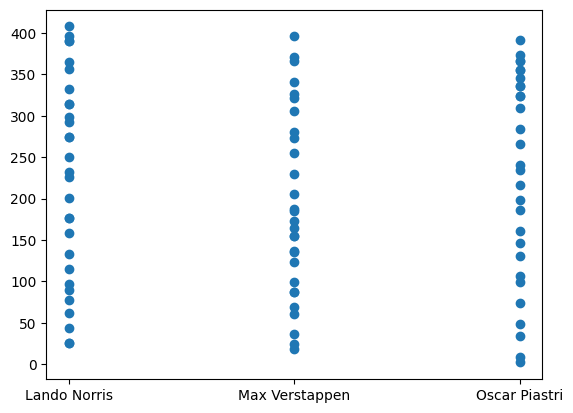

In [10]:
x = top3["Driver"]
y = top3["Cumulative Pts"]

plt.scatter(x, y )
plt.show()

In [11]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation

%matplotlib widget

In [ ]:
races = {"Australia": ["Lando Norris": 25, "Oscar Piastri": 18, "Max Verstappen":15],
         "Race 2": ["driver": 00, "driver": 00, "driver": 00 ],
         ... }

In [ ]:
# races = {}
# drivers = {}
# for race in top3["Race"].unique():
#     top3[top3["Race"] == race]
#     races.update({race:""})
#     for driver in top3["Driver"].unique():
#         drivers.update({driver:top3[top3["Cumulative Pts"]]})
        
# just go along with the 'top3' table maybe later for practice

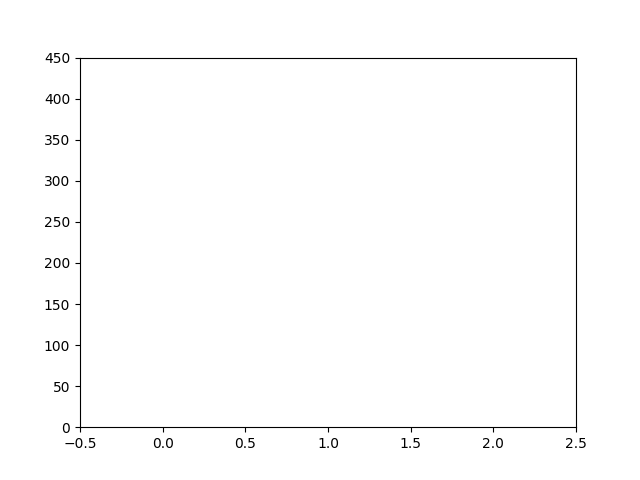

In [11]:
fig_f1 = plt.figure()
ax = plt.axes(xlim=(-0.5, 2.5), ylim=(0, 450))

# fig_f1.add_subplot()

# scat = ax.scatter([], [])

# def init():
#     scat.set_data([], [])
#     return scat,

def animate_f1_2025(i):

    ax.clear()

    race_name = top3["Race"].unique()[i]
    race_data = top3[top3["Race"] == race_name]

    drivers = top3["Driver"].unique()
    x = range(len(drivers))


    y = [race_data[race_data["Driver"] == driver]["Cumulative Pts"].values[0] for driver in drivers]


    ax.scatter(x, y)
    ax.set_xticks(x)
    ax.set_xticklabels(drivers)
    
    ax.set_title(f'{race_name}')

    ax.set_ylim(0, 450)
    ax.set_xlim(-0.5, 2.5)

anim_f1_2025 = animation.FuncAnimation(fig_f1,
                                animate_f1_2025,
                                # init_func=init, not needed for ax
                                frames = len(top3["Race"].unique()),
                                interval = 300,
                                repeat = True)
plt.show()


In [15]:
anim_f1_2025.save('f1_2.gif', 
          writer = 'pillow', fps = 1000)

In [12]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.cbook import get_sample_data

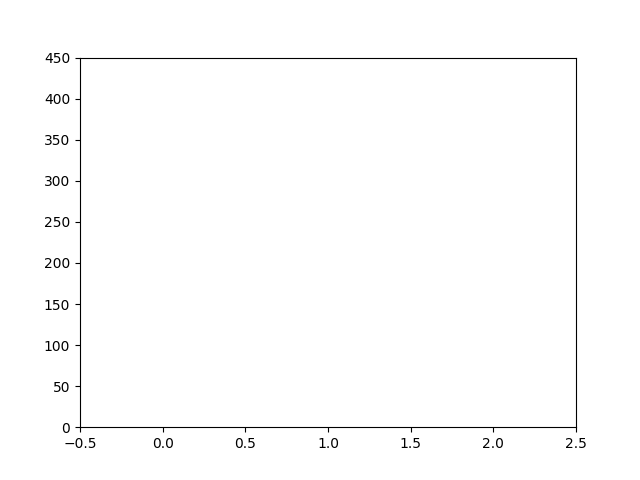

In [33]:
plt.close('all')

driver_img = {
    'Lando Norris': plt.imread('norris.png'),
    'Max Verstappen': plt.imread('verstappen.png'),
    'Oscar Piastri': plt.imread('piastri.png')
}



fig2_f1 = plt.figure()
ax = plt.axes(xlim=(-0.5, 2.5), ylim=(0, 450))


def animate2_f1_2025(i):

    ax.clear()

    
    ax = plt.axes(xlim=(-0.5, 2.5), ylim=(0, 450))


    race_name = top3["Race"].unique()[i]
    race_data = top3[top3["Race"] == race_name]

    drivers = top3["Driver"].unique()

    for idx, driver in enumerate(drivers):
        driver_points = race_data[race_data["Driver"] == driver]["Cumulative Pts"].values 
                         
        if len(driver_points) > 0:
            y_pos = driver_points[0]
            x_pos = idx

            img = driver_img[driver]
            imagebox = OffsetImage(img, zoom=0.15)
            ab = AnnotationBbox(imagebox, (x_pos, y_pos), frameon=False, pad=0)
            ax.add_artist(ab)

    ax.set_xticks(range(len(drivers)))
    ax.set_xticklabels(drivers, rotation=45, ha='right')
    ax.set_ylabel('Cumulative Points', fontsize=12)
    ax.set_title(f'{race_name}', fontsize=14)
    ax.set_ylim(0,450)
    ax.set_xlim(-0.5, len(drivers) - 0.5)
    ax.grid(True, alpha = 0.3)

            
anim2_f1_2025 = animation.FuncAnimation(fig2_f1,
                                animate2_f1_2025,
                                # init_func=init, not needed for ax
                                frames = len(top3["Race"].unique()),
                                interval = 100,
                                repeat = False)
plt.show()


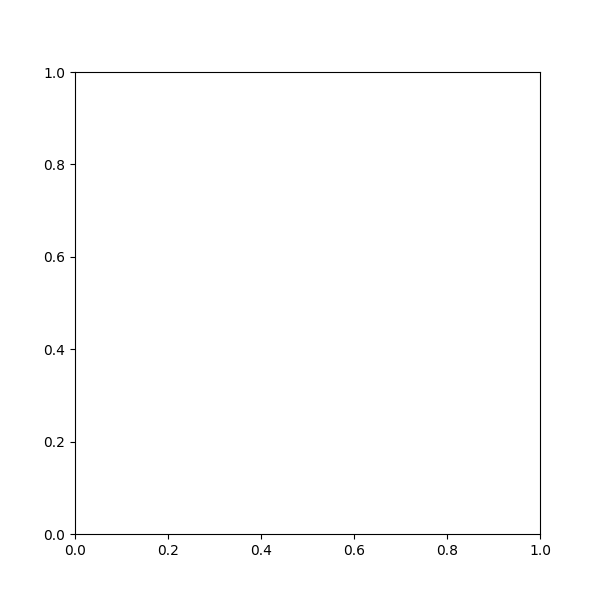

In [ ]:
plt.close('all')

driver_img = {
    'Lando Norris': plt.imread('norris.png'),
    'Max Verstappen': plt.imread('verstappen.png'),
    'Oscar Piastri': plt.imread('piastri.png')
}

# Sort races by date 
races_in_order = top3.sort_values('Date')["Race"].unique()

fig2_f1, ax = plt.subplots(figsize=(6, 6))

def animate2_f1_2025(i):
    ax.clear()
    
    # Fix limits 
    ax.set_xlim(-0.5, 2.5)
    ax.set_ylim(-20, 450)
    
    race_name = races_in_order[i]
    race_data = top3[top3["Race"] == race_name]
    drivers = top3["Driver"].unique()

    for idx, driver in enumerate(drivers):
        driver_points = race_data[race_data["Driver"] == driver]["Cumulative Pts"].values
                         
        if len(driver_points) > 0:
            y_pos = driver_points[0]
            x_pos = idx

            img = driver_img[driver]
            imagebox = OffsetImage(img, zoom=0.20)
            ab = AnnotationBbox(imagebox, (x_pos, y_pos), frameon=False, pad=0)
            ax.add_artist(ab)

    # Styling 
    ax.set_xticks(range(len(drivers)))
    ax.set_xticklabels(drivers, rotation=0, ha='center')
    ax.set_ylabel('Cumulative Points', fontsize=12)
    ax.set_title(f'{race_name}', fontsize=14)
    ax.grid(True, alpha=0.3)

            
anim2_f1_2025 = animation.FuncAnimation(fig2_f1,
                                animate2_f1_2025,
                                frames=len(races_in_order),
                                interval=500,
                                repeat=True)
plt.show()

In [50]:
anim2_f1_2025.save('f1_2025.gif', writer='pillow', fps=2)

In [26]:
plt.close('all')

In [21]:
plt.show()

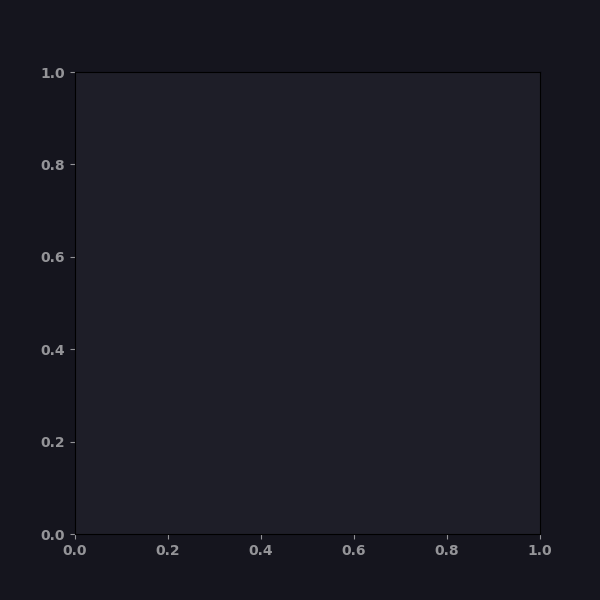

In [ ]:
plt.close('all')

driver_img = {
    'Lando Norris': plt.imread('norris.png'),
    'Max Verstappen': plt.imread('verstappen.png'),
    'Oscar Piastri': plt.imread('piastri.png')
}

# Sort races by date - make sure 
races_in_order = top3.sort_values('Date')["Race"].unique()

fig2_f1, ax = plt.subplots(figsize=(6, 6), facecolor='#15151E')
ax.set_facecolor('#1E1E28')

#styling of background and text
plt.rcParams['text.color'] = '#949498'
plt.rcParams['axes.labelcolor'] = '#949498'
plt.rcParams['xtick.color'] = '#949498'
plt.rcParams['ytick.color'] = '#949498'

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial Black', 'DejaVu Sans', 'Arial', 'Helvetica']
plt.rcParams['font.weight'] = 'bold'

def animate2_f1_2025(i):
    ax.clear()
    
    # Fix limits
    ax.set_xlim(-0.5, 2.5)
    ax.set_ylim(-20, 450)
    
    race_name = races_in_order[i] # get number of  race 
    race_data = top3[top3["Race"] == race_name] # get the corresponding race name
    drivers = top3["Driver"].unique() 

    # iterate through drivers names to get their images and cumulative points
    for idx, driver in enumerate(drivers): 
        driver_points = race_data[race_data["Driver"] == driver]["Cumulative Pts"].values
                         
        if len(driver_points) > 0:
            y_pos = driver_points[0]
            x_pos = idx

            # get the driver image as marker
            img = driver_img[driver]
            imagebox = OffsetImage(img, zoom=0.20)
            ab = AnnotationBbox(imagebox, (x_pos, y_pos), frameon=False, pad=0)
            ax.add_artist(ab)

    # Styling ticks and text
    ax.set_xticks(range(len(drivers)))
    ax.set_xticklabels(drivers, rotation=0, ha='center')
    ax.set_ylabel('CHAMPIONSHIP POINTS', fontsize=12, color='#E10600', fontweight='bold')
    ax.set_title(f'AFTER: {race_name}', fontsize=14, color='#E10600', fontweight='bold')
    ax.grid(True, alpha=0.3)

# animate             
anim2_f1_2025 = animation.FuncAnimation(fig2_f1,
                                animate2_f1_2025,
                                frames=len(races_in_order),
                                interval=500,
                                repeat=True)
plt.show()

In [61]:
anim2_f1_2025.save('f1_2025_edited.gif', writer='pillow', fps=2)